In [1]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

### Optimization results

In [2]:
df_ASAP =   pd.read_csv('./../ExpLogs/summ_c_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_c_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_c_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_c2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,c_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,c_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,c_Optim,6181.244077,18301.238246,1535.183674,10584.810496
3,c2_Optim,4356.432017,18301.238246,1253.999285,12690.806944


In [3]:

df_ASAP =   pd.read_csv('./../ExpLogs/summ_nc_ASAP.csv')
df_NoV2G =  pd.read_csv('./../ExpLogs/summ_nc_NoV2G.csv')
df_Optim =  pd.read_csv('./../ExpLogs/summ_nc_Optim.csv')
df_Optim1 = pd.read_csv('./../ExpLogs/summ_nc2_Optim.csv')

df_res = pd.concat([df_ASAP, df_NoV2G, df_Optim, df_Optim1], axis=0).reset_index(drop=True)
df_res

,name,transf,client,payoff,total
0,nc_ASAP,14937.478645,18301.238246,0.000000,3363.759602
1,nc_NoV2G,7522.477944,18301.238246,0.000000,10778.760303
2,nc_Optim,3595.171122,18301.238246,1733.129025,12972.938099
3,nc2_Optim,3595.171122,18301.238246,1733.129025,12972.938099


In [4]:
# Normalization dicts
optim_train = pd.read_csv("./../ExpLogs/train_Optim.csv")
optim_val = pd.read_csv("./../ExpLogs/val_Optim.csv")
optim_test = pd.read_csv("./../ExpLogs/test_Optim.csv")

nov2g_train = pd.read_csv("./../ExpLogs/train_NoV2G.csv")
nov2g_val =     pd.read_csv("./../ExpLogs/val_NoV2G.csv")
nov2g_test =   pd.read_csv("./../ExpLogs/test_NoV2G.csv")

asap_train = pd.read_csv("./../ExpLogs/train_ASAP.csv")
asap_val =     pd.read_csv("./../ExpLogs/val_ASAP.csv")
asap_test =   pd.read_csv("./../ExpLogs/test_ASAP.csv")


In [5]:
optim_test2 = pd.read_csv("./../ExpLogs/c2_Optim.csv")
optim_test2["imbalance_bill"].sum()

61681.70946062972

In [6]:
optim_test["imbalance_bill"].sum()

3595.171122161083

### RL Results

In [7]:
def load_rl_gen(name, num, dir = "", month = False, norm_dict = None):
    train_str = [f"./../ExpLogs/{dir}summ_train_{name}_{i}.csv" for i in range(num)]
    val_str   = [f"./../ExpLogs/{dir}summ_val_{name}_{i}.csv" for i in range(num)]
    test_str  = [f"./../ExpLogs/{dir}summ_test_{name}_{i}.csv" for i in range(num)]

    df_train = pd.concat([pd.read_csv(i) for i in train_str], axis=0).reset_index(drop=True)
    df_val = pd.concat([pd.read_csv(i) for i in val_str], axis=0).reset_index(drop=True)
    df_test = pd.concat([pd.read_csv(i) for i in test_str], axis=0).reset_index(drop=True)

    if norm_dict is not None:
        df_train["transf"] /= norm_dict["train"]
        df_val["transf"] /= norm_dict["val"]
        df_test["transf"] /= norm_dict["test"]

    return df_train, df_val, df_test

def load_rl(name, num, dir = ""):
    load_str = [f"./../ExpLogs/{dir}summ_{name}_{i}.csv" for i in range(num)]
    df_res = pd.concat([pd.read_csv(i) for i in load_str], axis=0).reset_index(drop=True)
    return df_res

def draw_hlines(ax, asap, nov2g, optim, x_max = 100):
    fontsize = 15
    ax.hlines(asap.sum(),  0, x_max, color='k', ls=':')
    ax.text(5, asap.sum(), "ASAP", fontsize = fontsize-4)
    ax.hlines(nov2g.sum(),  0, x_max, color='k', ls=':')
    ax.text(5, nov2g.sum(), "NoV2G", fontsize = fontsize-4)
    ax.hlines(optim.sum(), 0, x_max, color='k', ls=':')
    ax.text(5, optim.sum(), "Optim", fontsize = fontsize-4)

    ax.set_ylim(0, 1.1*asap.sum())
    ax.set_xlabel("Episode")

    return ax

In [9]:
norm_dict = {"train": optim_train["imbalance_bill"].sum(), "val": optim_val["imbalance_bill"].sum(), "test": optim_test["imbalance_bill"].sum()}
month_norm_dict = {"train": optim_train["imbalance_bill"][:768].sum(), "val": optim_val["imbalance_bill"][:768].sum(), "test": optim_test["imbalance_bill"][:768].sum()}
##df_train, df_val, df_test = load_rl_gen("sac_gen_a", 34, norm_dict = norm_dict)
df_m_train, df_m_val, df_m_test = load_rl_gen("month_sac_c", 697)
#df_res = load_rl("month_sac_c", 50) 
df_res = load_rl("month_sac_IX_f", 50) 

Text(0, 0.5, 'Imbalance Bill')

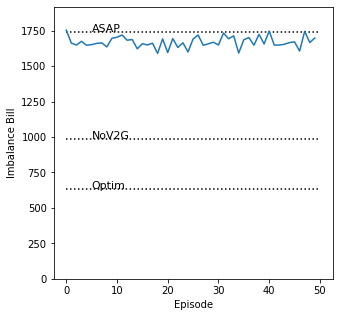

In [10]:
fig1, (ax1) = plt.subplots(1,1, figsize=(5,5))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum(), x_max = 50)
ax1.plot(df_res["transf"])
ax1.set_ylabel("Imbalance Bill")

Text(0.5, 0.98, 'Month SAC')

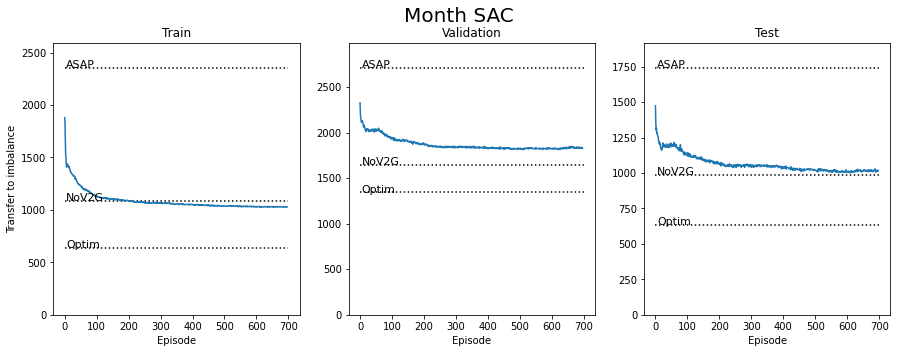

In [119]:
# Month
fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, asap_train["imbalance_bill"][:768].sum(), nov2g_train["imbalance_bill"][:768].sum(), optim_train["imbalance_bill"][:768].sum(), x_max = 700)
ax2 = draw_hlines(ax2, asap_val["imbalance_bill"][:768].sum(),   nov2g_val["imbalance_bill"][:768].sum(),   optim_val["imbalance_bill"][:768].sum()  , x_max = 700)
ax3 = draw_hlines(ax3, asap_test["imbalance_bill"][:768].sum(),  nov2g_test["imbalance_bill"][:768].sum(),  optim_test["imbalance_bill"][:768].sum() , x_max = 700)

ax1.plot(df_m_train["transf"])
ax2.plot(  df_m_val["transf"])
ax3.plot( df_m_test["transf"])

ax1.set_title("Train")
ax2.set_title("Validation")
ax3.set_title("Test")

ax1.set_ylabel("Transfer to imbalance")

fig1.suptitle("Month SAC", fontsize = 20)

Text(0.5, 0.98, 'SAC')

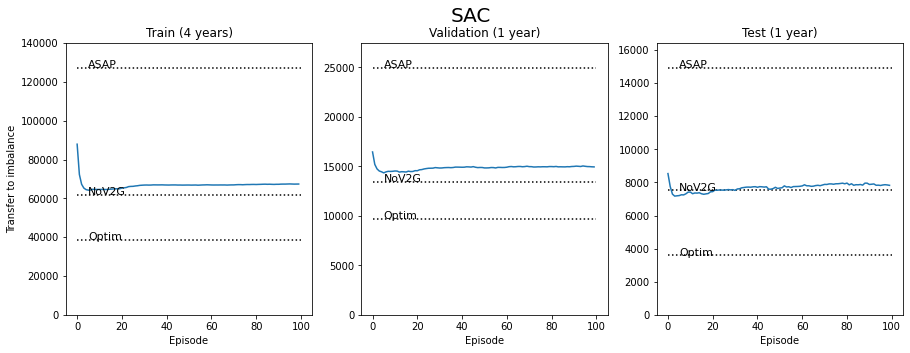

In [133]:
# Year
df_train, df_val, df_test = load_rl_gen("sac_c", 100)
#df_train, df_val, df_test = load_rl_gen("sac_d_c", 6)

fig1, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize=(15,5)) #, sharey = True)

ax1 = draw_hlines(ax1, asap_train["imbalance_bill"].sum(), nov2g_train["imbalance_bill"].sum(), optim_train["imbalance_bill"].sum())
ax2 = draw_hlines(ax2, asap_val["imbalance_bill"].sum(), nov2g_val["imbalance_bill"].sum(), optim_val["imbalance_bill"].sum())
ax3 = draw_hlines(ax3, asap_test["imbalance_bill"].sum(), nov2g_test["imbalance_bill"].sum(), optim_test["imbalance_bill"].sum())

ax1.plot(df_train["transf"])
ax2.plot(  df_val["transf"])
ax3.plot( df_test["transf"])

ax1.set_title("Train (4 years)")
ax2.set_title("Validation (1 year)")
ax3.set_title("Test (1 year)")

ax1.set_ylabel("Transfer to imbalance")

fig1.suptitle("SAC", fontsize = 20)

## Buffer size

Text(0.5, 1.0, 'Month SAC Buffersize')

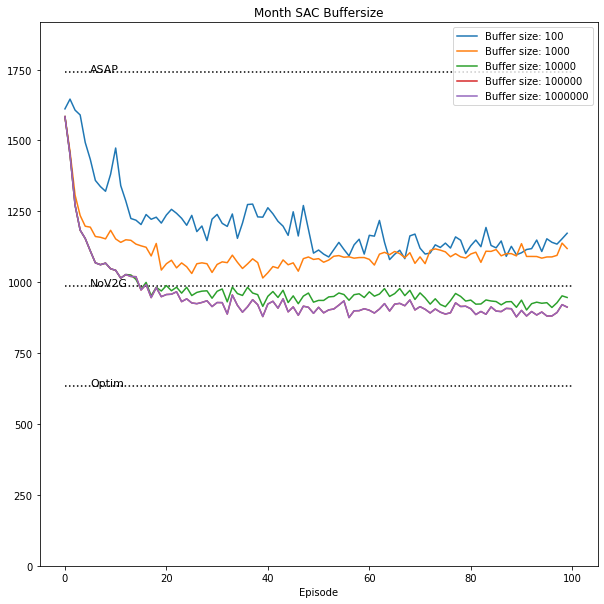

In [103]:
month_a_str = ["./../ExpLogs/summ_month_sac_IX_a_{}.csv".format(i) for i in range(100)]   
month_b_str = ["./../ExpLogs/summ_month_sac_IX_b_{}.csv".format(i) for i in range(100)]   
month_c_str = ["./../ExpLogs/summ_month_sac_IX_c_{}.csv".format(i) for i in range(100)]   
month_d_str = ["./../ExpLogs/summ_month_sac_IX_d_{}.csv".format(i) for i in range(100)]   
month_e_str = ["./../ExpLogs/summ_month_sac_IX_e_{}.csv".format(i) for i in range(100)]   

df_month_a = pd.concat([pd.read_csv(i) for i in month_a_str], axis=0).reset_index(drop=True)
df_month_b = pd.concat([pd.read_csv(i) for i in month_b_str], axis=0).reset_index(drop=True)
df_month_c = pd.concat([pd.read_csv(i) for i in month_c_str], axis=0).reset_index(drop=True)
df_month_d = pd.concat([pd.read_csv(i) for i in month_d_str], axis=0).reset_index(drop=True)
df_month_e = pd.concat([pd.read_csv(i) for i in month_e_str], axis=0).reset_index(drop=True)

fig1, (ax1) = plt.subplots(1,1, figsize=(10,10))

ax1 = draw_hlines(ax1, asap_test["imbalance_bill"][:768].sum(), nov2g_test["imbalance_bill"][:768].sum(), optim_test["imbalance_bill"][:768].sum())
ax1.plot(df_month_a["transf"], label = "Buffer size: 100")
ax1.plot(df_month_b["transf"], label = "Buffer size: 1000")
ax1.plot(df_month_c["transf"], label = "Buffer size: 10000")
ax1.plot(df_month_d["transf"], label = "Buffer size: 100000")
ax1.plot(df_month_e["transf"], label = "Buffer size: 1000000")

ax1.legend()

ax1.set_title("Month SAC Buffersize")

#/summ_month_sac_IX_e_94.csv

In [41]:
# Notes
df_train, df_val, df_test = load_rl_gen("month_sac_d", 3)
display(df_train.head())
display(df_val.head())
display(df_test.head())

,name,transf,client,payoff,total
0,train_month_sac_d_0,1583.547583,1469.562214,135.214407,-249.199776
1,train_month_sac_d_1,1290.695682,1469.562214,135.214407,43.652126
2,train_month_sac_d_2,1198.703552,1469.562214,135.214407,135.644256


,name,transf,client,payoff,total
0,val_month_sac_d_0,2278.333267,2277.450961,145.307986,-146.190293
1,val_month_sac_d_1,2056.834365,2277.450961,145.307986,75.308609
2,val_month_sac_d_2,2020.477284,2277.450961,145.307986,111.665690


,name,transf,client,payoff,total
0,test_month_sac_d_0,1736.844074,2289.492688,157.201251,395.447363
1,test_month_sac_d_1,1574.938689,2289.492688,157.201251,557.352748
2,test_month_sac_d_2,1488.377481,2289.492688,157.201251,643.913956
